# 🖼️ Image Captioning with BLIP Model: Step-by-Step Guide

This notebook demonstrates how to use the **BLIP (Bootstrapping Language-Image Pre-training)** model from Hugging Face to generate natural language captions for images.

BLIP is a state-of-the-art vision-language model that can understand images and generate descriptive text, useful for accessibility, image search, content generation, and more.

In [1]:
# Install dependencies
# !pip install transformers torch pillow matplotlib requests

## Import Required Libraries

In [2]:
import os
import requests
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration
import matplotlib.pyplot as plt
from PIL import Image
from typing import List

## Load the BLIP Model and Processor

We'll load the BLIP base model and processor from Hugging Face. We'll use GPU if available.

In [3]:
# Load BLIP Model and processor
def load_blip_model():
    print("Loading BLIP model and processor...")
    processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
    model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)

    print(f"Model loaded on device: {device}")
    return processor, model, device

processor, model, device = load_blip_model()

Loading BLIP model and processor...
Model loaded on device: cpu


## Display Image

A small function to display images inline with a title.

In [4]:
# Show an image
def show_image(image: Image.Image, title: str = None):
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis('off')
    if title:
        plt.title(title, fontsize=16)
    plt.show()

    print(f"Image Size: {image.size[0]} x {image.size[1]} pixels\n")

## Load and Display an Image

A small function to load images.

In [5]:
# Load Image from Local Path
def load_image_from_path(path: str) -> Image.Image:
    if not os.path.exists(path):
        raise FileNotFoundError(f"Image not found: {path}")
    image = Image.open(path).convert("RGB")
    return image

## Generate Caption for a Single Image

Let's process the image and generate a caption using the BLIP model.

In [6]:
# Generate caption for a single image
def generate_caption(
    image: Image.Image,
    processor: BlipProcessor,
    model: BlipForConditionalGeneration,
    device: str = "cpu",
    max_length: int = 30,
    num_beams: int = 5,
    do_sample: bool = False
) -> str:
    inputs = processor(images=image, return_tensors="pt").to(device)
    generated_ids = model.generate(
        **inputs,
        max_length=max_length,
        num_beams=num_beams if not do_sample else 1,
        do_sample=do_sample,
        top_p=0.95 if do_sample else None,
        top_k=50 if do_sample else None,
        early_stopping=True,
        no_repeat_ngram_size=2
    )
    caption = processor.decode(generated_ids[0], skip_special_tokens=True)
    return caption

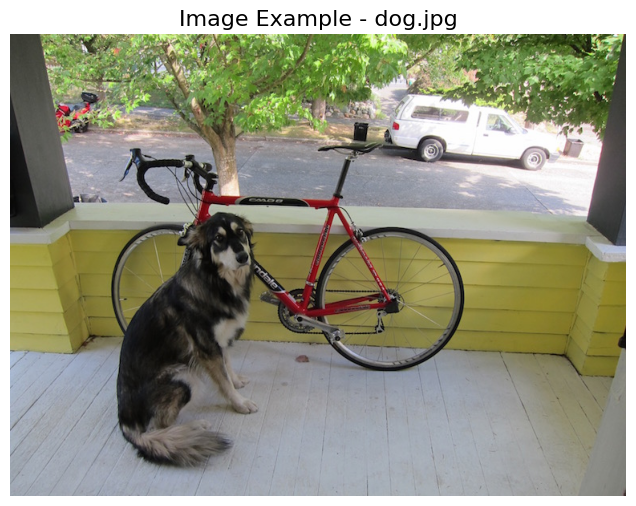

Image Size: 768 x 576 pixels



In [7]:
# Image Example
local_img_path = "dataset/dog.jpg"
image = load_image_from_path(local_img_path)
show_image(image, title="Image Example - dog.jpg")

In [8]:
# Generate and display caption
caption = generate_caption(image, processor, model, device)
print(f"Generated Caption: {caption}")

Generated Caption: a dog sitting next to a bicycle on a porch


## Experiment with Sampling (Creative Captions)

Use sampling with top-k and top-p to generate diverse captions.

In [9]:
# Generate captions
def generate_sampled_captions(
    image: Image.Image,
    processor: BlipProcessor,
    model: BlipForConditionalGeneration,
    device: str = "cpu",
    max_length: int = 30,
    num_samples: int = 3
) -> List[str]:
    inputs = processor(images=image, return_tensors="pt").to(device)
    generated_ids = model.generate(
        **inputs,
        max_length=max_length,
        do_sample=True,
        top_p=0.9,
        top_k=50,
        num_return_sequences=num_samples,
        no_repeat_ngram_size=2
    )
    captions = [processor.decode(g, skip_special_tokens=True) for g in generated_ids]
    return captions

sampled_captions = generate_sampled_captions(image, processor, model, device)
print("Sampled Captions:")
for idx, cap in enumerate(sampled_captions, 1):
    print(f"{idx}. {cap}")

Sampled Captions:
1. a dog sitting next to a bicycle and bench
2. a dog sitting in the doorway looking at a bicycle
3. a dog sitting on a porch near a bike


## Batch Caption Generation

You can also generate captions for multiple images at once.

In [10]:
# Generate captions for a batch of PIL images
def generate_captions_batch(
    images: List[Image.Image],
    processor: BlipProcessor,
    model: BlipForConditionalGeneration,
    device: str = "cpu",
    max_length: int = 30,
    num_beams: int = 5
) -> List[str]:

    captions = []
    for image in images:
        caption = generate_caption(
            image,
            processor,
            model,
            device,
            max_length=max_length,
            num_beams=num_beams
        )
        captions.append(caption)
    return captions

In [11]:
# Load local images
local_image_paths = [
    "dataset/animals.jpg",
    "dataset/basketball.jpg",
    "dataset/boat.jpg",
    "dataset/bridge.jpg",
    "dataset/building_construction.jpg",
    "dataset/car_road.jpg",
    "dataset/city.jpg",
    "dataset/cycling.jpg",
    "dataset/dog.jpg",
    "dataset/football.jpg",
    "dataset/lake.jpg",
    "dataset/plane_airport.jpg",
    "dataset/street.jpg",
    "dataset/train.jpg"
]

images_batch = [Image.open(path).convert("RGB") for path in local_image_paths]

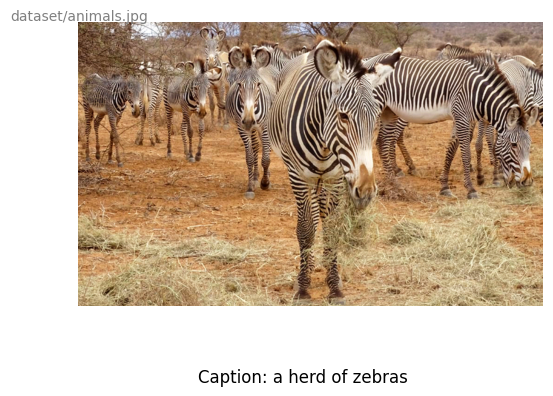

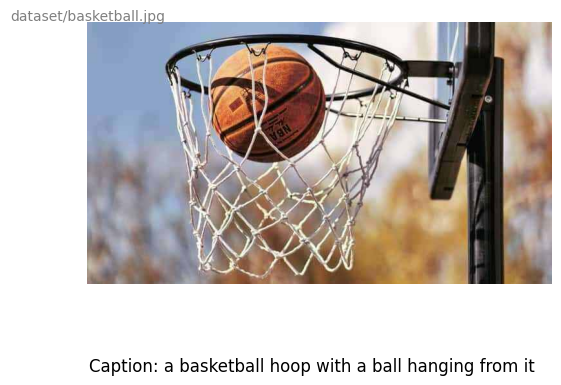

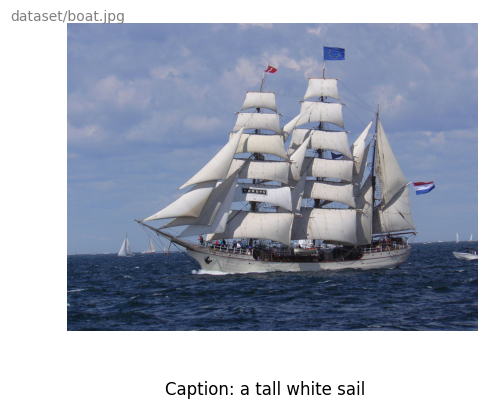

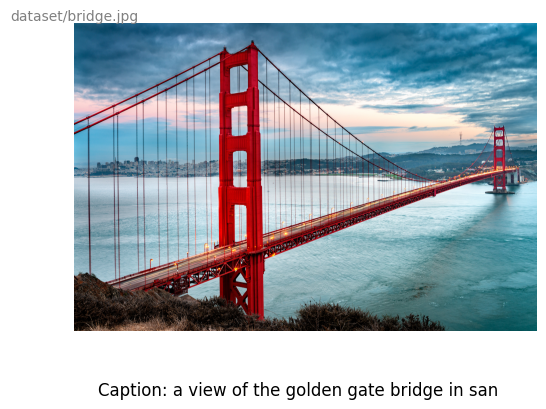

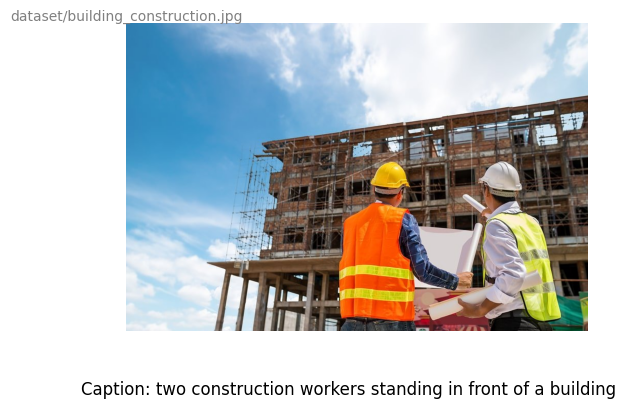

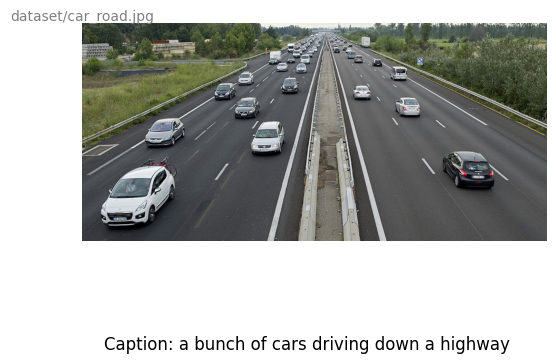

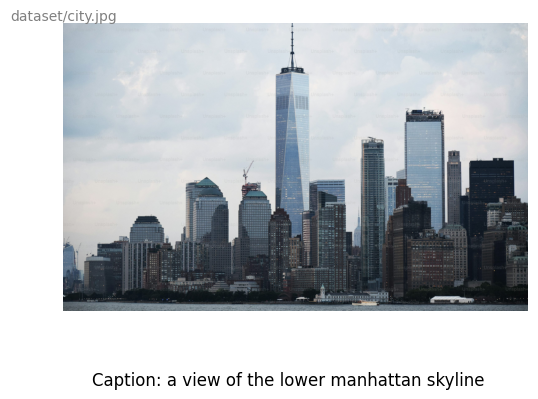

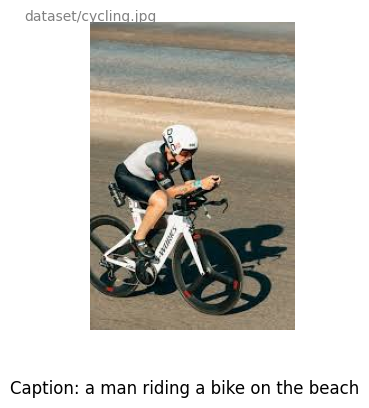

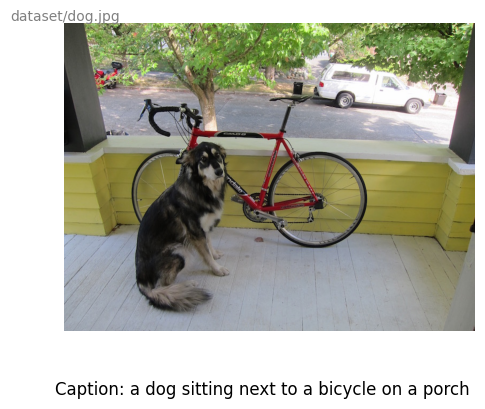

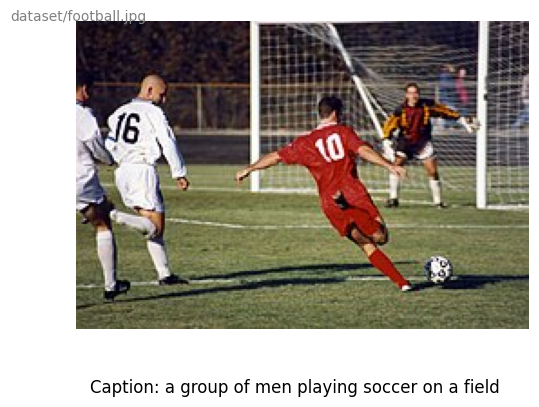

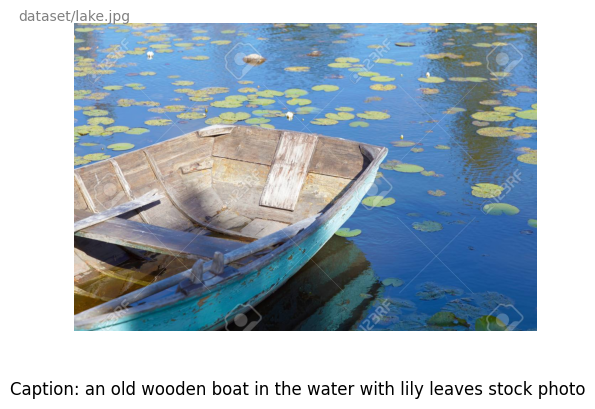

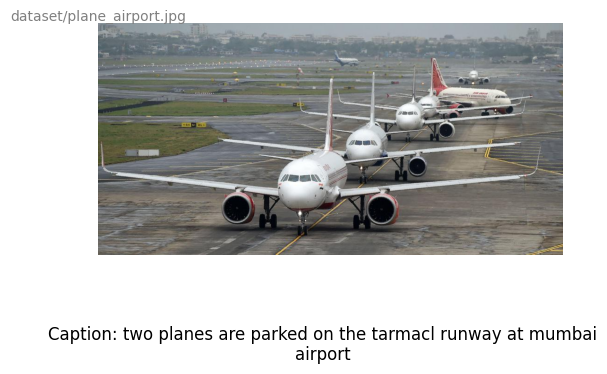

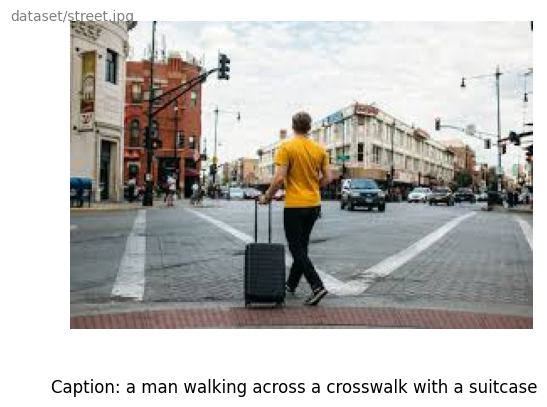

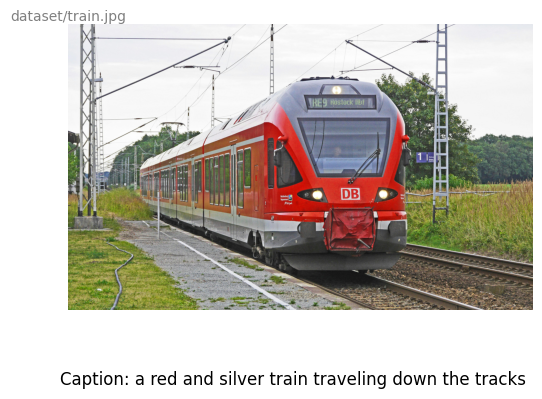

In [12]:
# Generate captions
batch_captions = generate_captions_batch(images_batch, processor, model, device)

# Display each image with its caption underneath
for img, caption, path in zip(images_batch, batch_captions, local_image_paths):
    plt.figure(figsize=(6, 4))
    plt.text(0.5, 1.05, path, ha='center', va='bottom', fontsize=10, color='gray')
    plt.imshow(img)
    plt.axis('off')
    plt.figtext(0.5, -0.05, f"Caption: {caption}", wrap=True, ha="center", fontsize=12)
    plt.show()
    print("\n")

**Summary:**
- We loaded and used the **BLIP image captioning model**.
- **Generated captions** for **single** and **multiple images**.
- Explored beam search and sampling methods.
You can integrate this model into applications like image search, accessibility tools or content creation.